In [32]:
# import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# from nltk import sent_tokenize, word_tokenize
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import stopwords
# import pandas as pd
# import numpy as np 
# import re
# import spacy 
# !pip install kafka-python
# !pip install python-twitter
# !pip install tweepy
# !pip install tweepy
# nlp=spacy.load('en_core_web_sm')

# from tweepy.streaming import StreamListener
# from tweepy import OAuthHandler 
# from tweepy import Stream


In [34]:
import tweepy
import pandas as pd

In [42]:
# Secret Credentials 
ACCESS_TOKEN = "500435442-ZsyX0WGAgAsiK3mPMwCLVZgXaM4mPeLpOZHh46Uc"
ACCESS_TOKEN_SECRET = "tI6pbzVsXWzNmfUEC07by6ZpJc5d58vu0sKxovxuDQEoY"
CONSUMER_KEY = "zazEfoGYmcJp8IZCQZYeleORe"
CONSUMER_SECRET = "JtTfz6C4WaCNZkzmn02U4GkOoilCyiIVKFFknuLgWD51MeVySm"

In [43]:
auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
api=tweepy.API(auth)

In [123]:
tweets=[]
retweet=[]
likes=[]

In [ ]:
userx='elonmusk'

In [124]:
for i in tweepy.Cursor(api.user_timeline,id=userx,tweet_mode='extended').items(200):
    tweets.append(i.full_text)
    retweet.append(i.retweet_count)
    likes.append(i.favorite_count)
    

In [125]:
Twitter_df2=pd.DataFrame({'tweets':tweets,'likes':likes,'retweet':retweet})
Twitter_df2

,tweets,likes,retweet
0,"RT @Tesla: 6,000+ Superchargers across Europe ...",0,2338
1,@SpaceXMR 🤣🤣,1888,89
2,"@TheOnion Shame on you, Onion. This is why peo...",13322,865
3,@howlpolitically @TheOnion 2/2\nMy father &amp...,2794,320
4,@howlpolitically @TheOnion 1/2\nThis article i...,4038,480
...,...,...,...
95,@itsALLrisky Yes!,11011,1509
96,@TSLAgang @SpinelessModer1 Yes,2300,80
97,@ashleevance For sure wise for elderly or immu...,8986,450
98,FSD Beta has now been expanded to ~2000 owners...,22752,1517


In [126]:
# Extracting the list of stop words
stopwords=[]
stopwords_list=open("stopwords_en.txt","r")
for x in stopwords_list.readlines():
    stopwords.append(x)
    stopwords=list(map(lambda x:x.strip(),stopwords))

    

In [107]:
# k=tweets[2].split(" ")
# b=['you','why']
# 'why' in k
list(Twitter_df2['tweets'][2].split(' '))

['@TheOnion',
 'Shame',
 'on',
 'you,',
 'Onion.',
 'This',
 'is',
 'why',
 'people',
 'are',
 'switching',
 'to',
 '@TheBabylonBee!']

<ipython-input-108-cefaa7bfc6ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Twitter_df2['tweets'][i]=Twitter_df2['tweets'][i].replace(stopwords[j],'')


In [127]:
# Applying porter stemmer to trim down the tweets
from nltk.stem import PorterStemmer,WordNetLemmatizer
trimmed_tweets=[]
porter_stemmer=PorterStemmer()
trimmed_tweets_DS=[]
for i in range(len(Twitter_df2['tweets'])):
    tweets = ''.join(Twitter_df2['tweets'][i])
    tokens=tweets.split()
    stemmed_tokens=[porter_stemmer.stem(token) for token in tokens]
    tweet=' '.join(stemmed_tokens)
    trimmed_tweets.append(tweet)

In [128]:
# Applying Regex to indetify for tokenization 
from nltk.tokenize import RegexpTokenizer

tweets_tokenized={}
tokenizer=RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?")
raw_text="" 
for item2 in trimmed_tweets:
    raw_text=raw_text+str(item2)
    raw_text=raw_text.lower()
    unigram_tokens=tokenizer.tokenize(raw_text)
    # Applying condition for length greater than 3 and lower bound 
    unigram_tokens=[value for index,value in enumerate(unigram_tokens) if len(value)>3 and value.lower() not in stopwords]
unigram_tokens

['tesla',
 'supercharg',
 'europ',
 'locat',
 'counting',
 'epavlic',
 'minimalduck',
 'https',
 'spacexmr',
 'theonion',
 'shame',
 'onion',
 'peopl',
 'switch',
 'thebabylonbee',
 'howlpolit',
 'theonion',
 'father',
 'extend',
 'famili',
 'depend',
 'financi',
 'support',
 'brother',
 'years',
 'articl',
 'actual',
 'accurate',
 'https',
 'evpcx',
 'howlpolit',
 'theonion',
 'articl',
 'false',
 'arriv',
 'canada',
 'paid',
 'college',
 'student',
 'debt',
 'start',
 'compani',
 'fund',
 'comput',
 'built',
 'evid',
 'whatsoev',
 'emerald',
 'mine',
 'jubanmoham',
 'handlif',
 'scandal',
 'call',
 'elong',
 'universal',
 'comment',
 'thread',
 'defi',
 'defi',
 'itsallriski',
 'kimdotcom',
 'rover',
 'back',
 'https',
 'oafocezruu',
 'kimdotcom',
 'fair',
 'point',
 'dogecoinww',
 'mattwallace',
 'corinnakopf',
 'rais',
 'good',
 'point',
 'haha',
 'blockfolio',
 'evafoxu',
 'shame',
 'info',
 'spacex',
 'deploy',
 'starlink',
 'satellit',
 'confirm',
 'https',
 'xcbrq',
 'lexfridma

In [129]:
# Storing vocabulary and their number of occurances in a dictionary
vocab=list(set(unigram_tokens))
count=[]
for j in range(len(vocab)):
    count.append(unigram_tokens.count(vocab[j]))
User_tweets=dict(zip(unigram_tokens,count))
    

In [141]:
from collections import Counter 

Tweet_Counter = Counter(User_tweets) 
Tweet_Uni=Tweet_Counter.most_common(100)
Tweet_Uni=dict(Tweet_Uni)

In [143]:
Tweet_Uni

{'long': 15,
 'bullshit': 10,
 'softwar': 6,
 'vinternix': 6,
 'booster': 6,
 'bitcoin': 5,
 'winner-takes': 5,
 'featur': 4,
 'multiplanetari': 4,
 'storag': 4,
 'sometim': 4,
 'epavlic': 3,
 'capabl': 3,
 'yfdsl': 3,
 'threshold': 3,
 'goal': 3,
 'serv': 3,
 'manufactur': 3,
 'improv': 3,
 'sens': 3,
 'talk': 3,
 'launch': 3,
 'supercharg': 2,
 'howlpolit': 2,
 'financi': 2,
 'evpcx': 2,
 'arriv': 2,
 'comput': 2,
 'built': 2,
 'comment': 2,
 'thread': 2,
 'defi': 2,
 'oafocezruu': 2,
 'mattwallace': 2,
 'corinnakopf': 2,
 'learn': 2,
 'self-sustaining': 2,
 'level': 2,
 'andrewyang': 2,
 'seat': 2,
 'nasaspaceflight': 2,
 'a-quarter': 2,
 'english': 2,
 'probabl': 2,
 'daelmor': 2,
 'financ': 2,
 'erdayastronaut': 2,
 'music': 2,
 'includ': 2,
 'remouherek': 2,
 'histori': 2,
 'stage': 2,
 'joint': 2,
 'pathfinder': 2,
 'baffl': 2,
 'song': 2,
 'love': 2,
 'heart': 2,
 'tesla': 1,
 'europ': 1,
 'locat': 1,
 'counting': 1,
 'minimalduck': 1,
 'https': 1,
 'spacexmr': 1,
 'theonion': 

In [166]:
count1=list(Tweet_Uni.values())
size1=[]
for i in count1:
    size1.append(i*10)

colours=[]
c=120
for i in range(len(count1)):
    c=c+2
    colours.append(c)

(-0.5, 399.5, 199.5, -0.5)

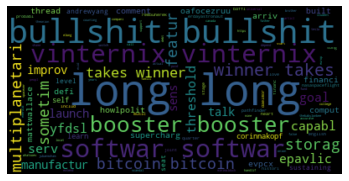

In [146]:
# text = " ".join([(k + " ")*v for k,v in Tweet_Uni.items()])

# # Generate a word cloud image
# wordcloud = WordCloud().generate(text)


# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")


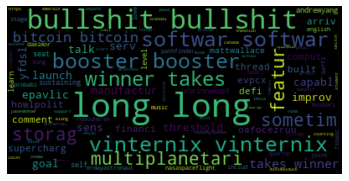

In [147]:

# # lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()



In [167]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=list(Tweet_Uni.keys()),
    y=count1,
    mode='markers',
    marker=dict(
        color=colours,
        size=size1,
        showscale=True
        )
)])

fig.show()

In [155]:
Tweet_Uni.keys()

dict_keys(['long', 'bullshit', 'softwar', 'vinternix', 'booster', 'bitcoin', 'winner-takes', 'featur', 'multiplanetari', 'storag', 'sometim', 'epavlic', 'capabl', 'yfdsl', 'threshold', 'goal', 'serv', 'manufactur', 'improv', 'sens', 'talk', 'launch', 'supercharg', 'howlpolit', 'financi', 'evpcx', 'arriv', 'comput', 'built', 'comment', 'thread', 'defi', 'oafocezruu', 'mattwallace', 'corinnakopf', 'learn', 'self-sustaining', 'level', 'andrewyang', 'seat', 'nasaspaceflight', 'a-quarter', 'english', 'probabl', 'daelmor', 'financ', 'erdayastronaut', 'music', 'includ', 'remouherek', 'histori', 'stage', 'joint', 'pathfinder', 'baffl', 'song', 'love', 'heart', 'tesla', 'europ', 'locat', 'counting', 'minimalduck', 'https', 'spacexmr', 'theonion', 'shame', 'onion', 'peopl', 'switch', 'thebabylonbee', 'father', 'extend', 'famili', 'depend', 'support', 'brother', 'years', 'articl', 'actual', 'accurate', 'false', 'canada', 'paid', 'college', 'student', 'debt', 'start', 'compani', 'fund', 'evid', 'w